In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [86]:
df = pd.read_csv('insurance.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [87]:
print('sex', df['sex'].unique())
print('smoker', df['smoker'].unique())
print('region', df['region'].unique())

sex ['female' 'male']
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


<Axes: xlabel='bmi', ylabel='Count'>

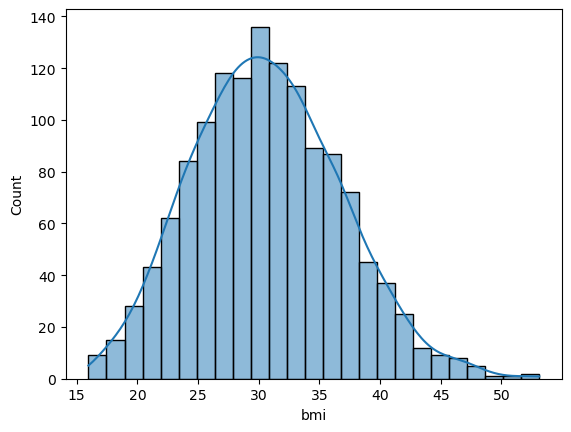

In [88]:
sns.histplot(x=df['bmi'], kde=True)

<Axes: xlabel='charges', ylabel='Count'>

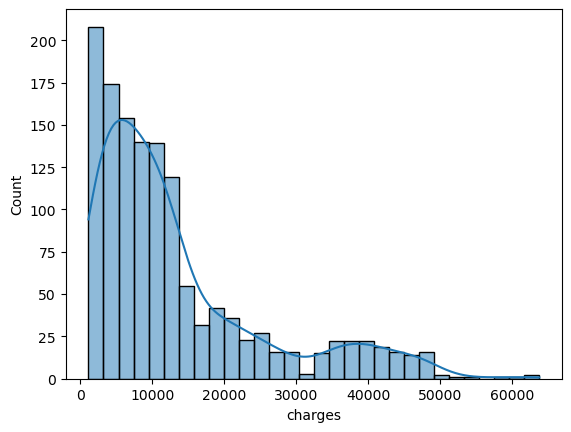

In [89]:
sns.histplot(x=df['charges'], kde=True)

In [28]:
print("=== Charges (5 highest and lowest) ===")
display(pd.concat([df.nsmallest(5, "charges"), df.nlargest(5, "charges")]))

print("\n=== BMI (5 highest and lowest) ===")
display(pd.concat([df.nsmallest(5, "bmi"), df.nlargest(5, "bmi")]))


=== Charges (5 highest and lowest) ===


,age,sex,bmi,children,smoker,region,charges
940,18,male,23.210,0,no,southeast,1121.87390
808,18,male,30.140,0,no,southeast,1131.50660
1244,18,male,33.330,0,no,southeast,1135.94070
663,18,male,33.660,0,no,southeast,1136.39940
22,18,male,34.100,0,no,southeast,1137.01100
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209



=== BMI (5 highest and lowest) ===


,age,sex,bmi,children,smoker,region,charges
172,18,male,15.960,0,no,northeast,1694.79640
428,21,female,16.815,1,no,northeast,3167.45585
1226,38,male,16.815,2,no,northeast,6640.54485
412,26,female,17.195,2,yes,northeast,14455.64405
250,18,male,17.290,2,yes,northeast,12829.45510
1317,18,male,53.130,0,no,southeast,1163.46270
1047,22,male,52.580,1,yes,southeast,44501.39820
847,23,male,50.380,1,no,southeast,2438.05520
116,58,male,49.060,0,no,southeast,11381.32540
286,46,female,48.070,2,no,northeast,9432.92530


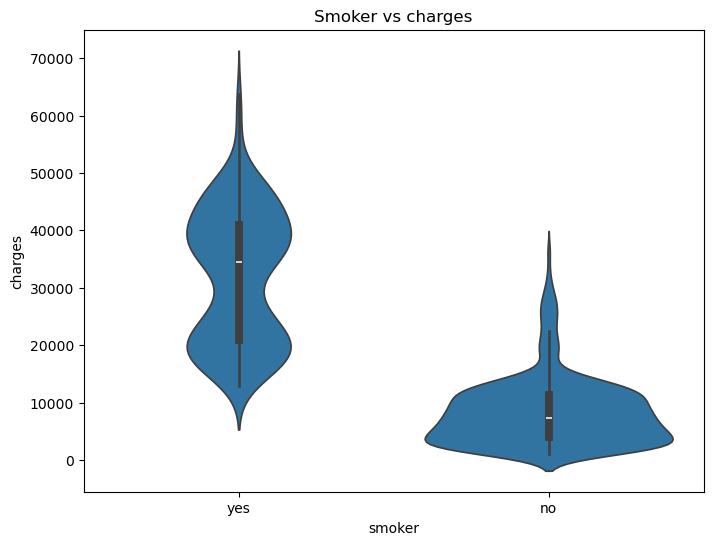

In [90]:
plt.figure(figsize=(8,6))
sns.violinplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs charges')
plt.show()

<h3 style="font-size:20px;">Data Quality Summary</h3>

<div style="font-size:18px;">

- Categorical columns (`sex`, `smoker`, `region`) contain only meaningful and valid values.  
- No missing values (`NaN`) or typos were found in categorical features.  
- Numerical columns (`age`, `bmi`, `children`, `charges`) fall within logical ranges and do not contain errors.  
- Distributions of selected variables (e.g., `charges`, `bmi`) were reviewed and show no anomalies.  

We can therefore conclude that the dataset is **clean and consistent**, which allows us to proceed with further analysis and modeling.

</div>


In [91]:
X = df.drop('charges', axis=1)
y = df['charges']

In [92]:
X = pd.get_dummies(X, drop_first=True)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

<h3 style="font-size:20px;">Standardization (Optional but Recommended for Linear Regression)</h3>

<div style="font-size:18px;">

Standardization transforms numerical features so that they have a mean of 0 and a standard deviation of 1.  
This step ensures that all variables are on the same scale, preventing features with larger ranges (e.g., `charges`) from dominating the regression model.  
It also improves numerical stability and makes coefficients easier to interpret.  

</div>


In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

<h3 style="font-size:20px;">Note on Ridge and Lasso Regression</h3>

<div style="font-size:18px;">

In linear regression we minimize the **Mean Squared Error (MSE)** to find the best-fitting line:  

</div>

<div style="font-size:22px; margin-top:15px">
$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
</div>

<div style="font-size:18px; margin-top:15px;">

- $y_i$ → actual value  
- $\hat{y}_i$ → predicted value  
- $n$ → number of observations  

---

When using **Ridge** or **Lasso**, we add a penalty term to the loss function:  

</div>

<div style="font-size:22px; margin-top:15px">
$Loss_{Ridge} = MSE + \alpha \sum_{j=1}^{p} \beta_j^2$
</div>

<div style="font-size:22px; margin-top:15px">
$Loss_{Lasso} = MSE + \alpha \sum_{j=1}^{p} |\beta_j|$
</div>

<div style="font-size:18px; margin-top:15px;">

- $\beta_j$ → model coefficients  
- $\alpha$ → regularization strength  
- $p$ → number of features  

**Ridge (L2 penalty):** shrinks coefficients towards zero, but none become exactly zero.  
**Lasso (L1 penalty):** can shrink some coefficients to exactly zero, performing feature selection.  

---

In this dataset we only have a few independent features (`age`, `bmi`, `children`, `sex`, `smoker`, `region`).  
Because the number of predictors is small and they are reasonably independent, the standard **Linear Regression** model without regularization is sufficient.  
Introducing Ridge or Lasso here would not significantly improve performance and might even make interpretation less clear.  

</div>


In [95]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [96]:
from sklearn.metrics import mean_squared_error, r2_score
pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, pred)
rmse = mse**0.5
r2 = r2_score(y_test, pred)


print('RMSE:', rmse)
print('R2:' , r2)

RMSE: 5814.412430964467
R2: 0.7694284637867439


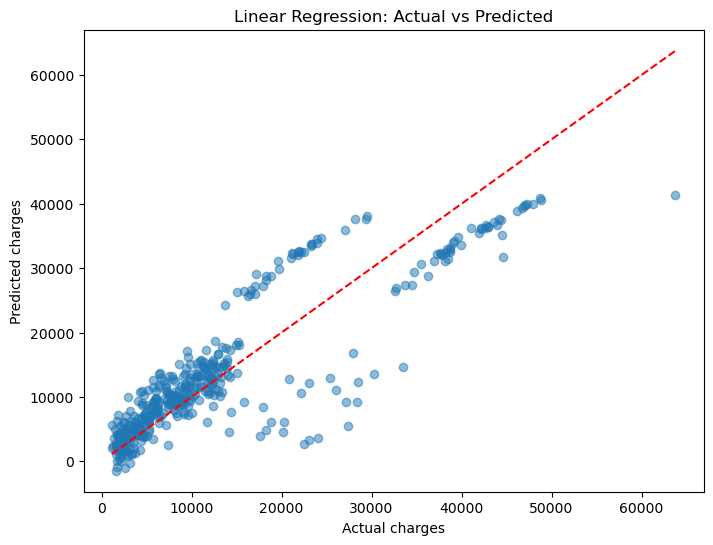

In [97]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


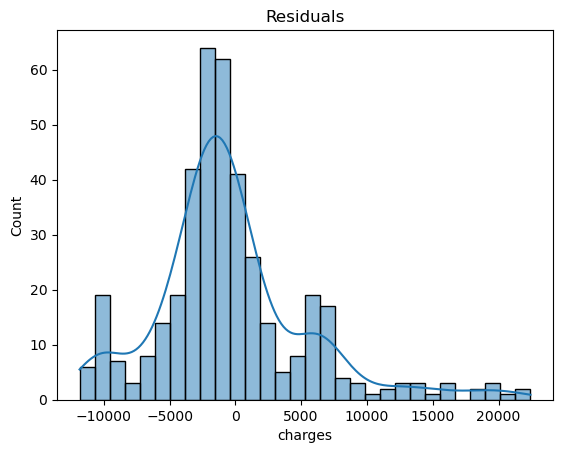

In [50]:
errors = y_test - pred
sns.histplot(errors, bins=30, kde=True)
plt.title("Residuals")
plt.show()


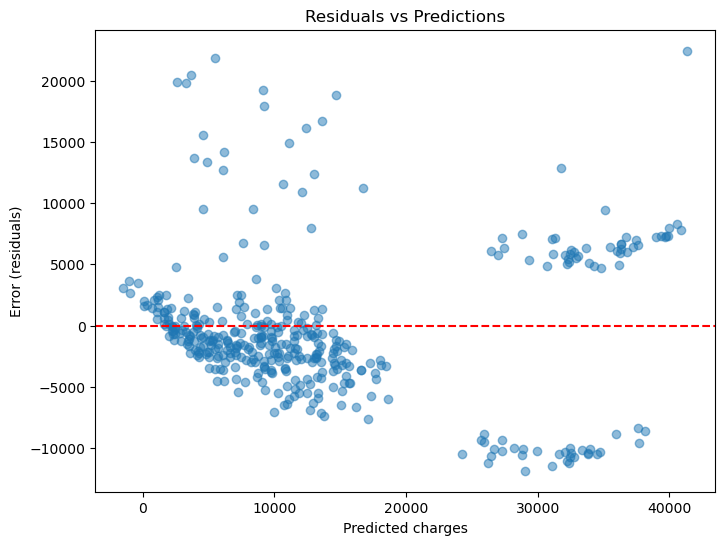

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(pred, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted charges")
plt.ylabel("Error (residuals)")
plt.title("Residuals vs Predictions")
plt.show()


<h3 style="font-size:20px;">Linear Regression Model Evaluation</h3>

<div style="font-size:18px;">

- The baseline linear regression model achieved the following metrics:  
  - **RMSE ≈ 5814** → the average prediction error in medical charges is about 5800 USD.  
  - **R² ≈ 0.77** → the model explains approximately 77% of the variance in `charges`.  

- The **scatterplot of actual vs. predicted values** confirms these metrics:  
  - For low and mid-range charges, predictions align well with the reference diagonal (red dashed line).  
  - For high charges (>20k USD), predictions are **systematically underestimated**, which is consistent with the presence of non-linear effects (notably, the strong influence of the `smoker` variable).  

- This behavior is typical of linear regression:  
  - It assumes a strictly linear relationship between predictors and the target.  
  - Complex interactions and non-linearities (e.g., smoker × bmi) are not fully captured.  

- **Key insights:**  
  - The model is effective as a **baseline** and demonstrates good predictive power for the majority of cases.  
  - It struggles with **high-cost outliers**, which may require transformations (e.g., log-transform of `charges`) or non-linear models (Random Forest, Gradient Boosting).  

We therefore conclude that the linear regression provides a **solid starting point**, but further modeling will be necessary to capture the full complexity of the dataset.


In subsequent steps, we will apply **feature engineering** to improve both model accuracy and efficiency.
</div>


In [56]:
df["bmi_smoker"] = df["bmi"] * (df["smoker"] == "yes").astype(int)
df["age_smoker"] = df["age"] * (df["smoker"] == "yes").astype(int)

In [77]:
X_fe = df.drop("charges", axis=1)   # FE = feature engineered
y_fe = df["charges"]

In [79]:
X_fe = pd.get_dummies(X_fe, drop_first=True)

In [80]:
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe, y_fe, test_size=0.3, random_state=42
)

In [81]:
scaler_fe = StandardScaler()
X_train_fe_scaled = scaler_fe.fit_transform(X_train_fe)
X_test_fe_scaled = scaler_fe.transform(X_test_fe)

In [82]:
model_fe = LinearRegression()
model_fe.fit(X_train_fe_scaled, y_train_fe)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
y_pred_fe = model_fe.predict(X_test_fe_scaled)

mse_fe = mean_squared_error(y_test_fe, y_pred_fe)
rmse_fe = mse_fe**0.5
r2_fe = r2_score(y_test_fe, y_pred_fe)

print("RMSE (FE):", rmse_fe)
print("R² (FE):", r2_fe)

RMSE (FE): 4492.739144510943
R² (FE): 0.8623372528708144


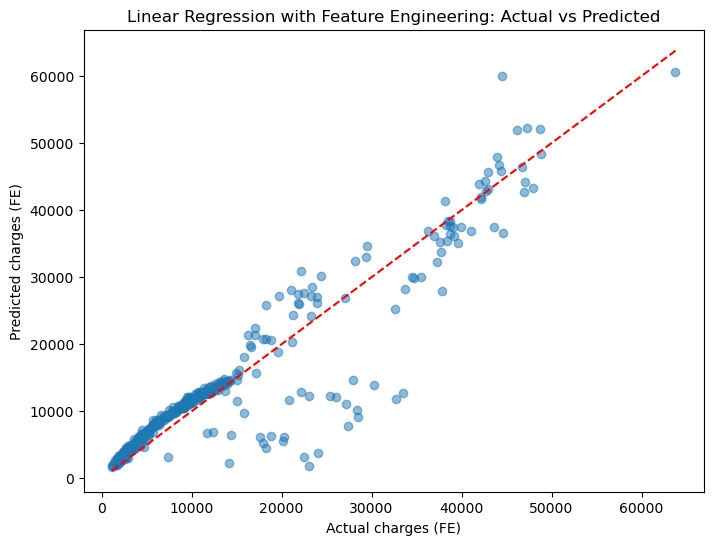

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_fe, y_pred_fe, alpha=0.5)
plt.plot([y_test_fe.min(), y_test_fe.max()], [y_test_fe.min(), y_test_fe.max()], 'r--')
plt.xlabel("Actual charges (FE)")
plt.ylabel("Predicted charges (FE)")
plt.title("Linear Regression with Feature Engineering: Actual vs Predicted")
plt.show()


In [99]:
print("Baseline Linear Regression")
print("  RMSE:", rmse)
print("  R²:", r2)

print("\nLinear Regression with Feature Engineering")
print("  RMSE (FE):", rmse_fe)
print("  R² (FE):", r2_fe)

Baseline Linear Regression
  RMSE: 5814.412430964467
  R²: 0.7694284637867439

Linear Regression with Feature Engineering
  RMSE (FE): 4492.739144510943
  R² (FE): 0.8623372528708144


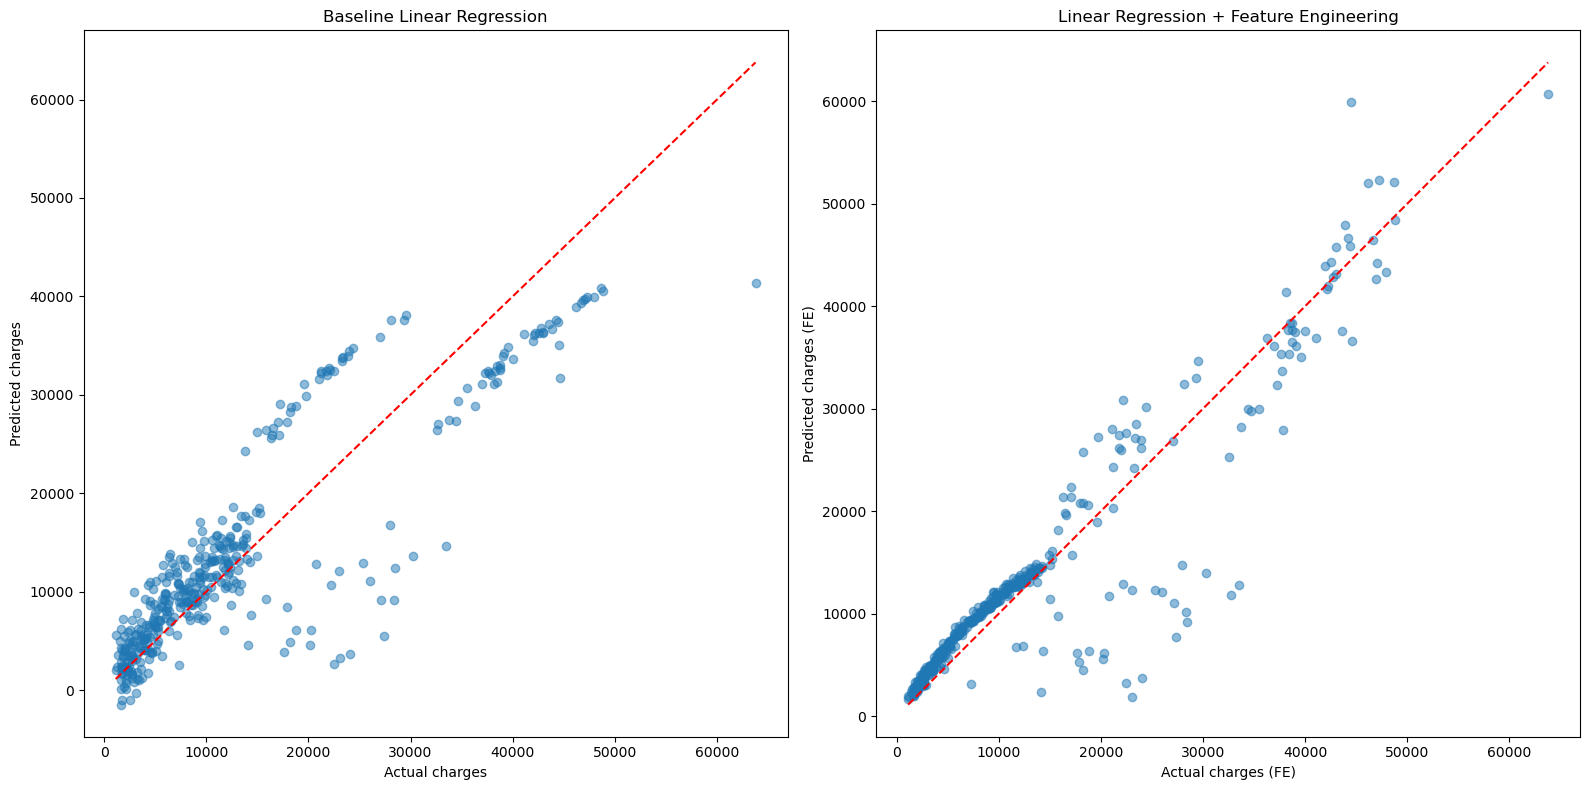

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# baseline
axes[0].scatter(y_test, pred, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_xlabel("Actual charges")
axes[0].set_ylabel("Predicted charges")
axes[0].set_title("Baseline Linear Regression")

# feature engineering
axes[1].scatter(y_test_fe, y_pred_fe, alpha=0.5)
axes[1].plot([y_test_fe.min(), y_test_fe.max()], [y_test_fe.min(), y_test_fe.max()], 'r--')
axes[1].set_xlabel("Actual charges (FE)")
axes[1].set_ylabel("Predicted charges (FE)")
axes[1].set_title("Linear Regression + Feature Engineering")

plt.tight_layout()
plt.show()

<h3 style="font-size:20px;"> Limitations of Linear Regression</h3>

<div style="font-size:18px;">

The comparison between the baseline model and the version with feature engineering highlights attributes of linear regression:

- **Baseline model (left):** predictions for high charges are strongly underestimated.  
  This is especially visible for smokers and customers with expensive policies, where points fall well below the diagonal line.  

- **Feature engineering (right):** the improvement is noticeable.  
  Predictions for mid-range values are closer to the diagonal, showing that additional features help the model capture more variance.  

- **Remaining problem:** in the high-cost range (30k–60k), predictions are still systematically biased downwards.  
  In a real insurance setting, such a model would underestimate risk for expensive customers, leading to financial losses.  

In conclusion, linear regression (even with feature engineering) serves as a **valuable academic demonstration**, but it is not sufficient for real-world use cases.  
More advanced models (e.g., tree-based ensembles or nonlinear methods) are necessary to properly capture the complexity of the data.  

</div>
